# 1 Author

**Student Name**:  Yiwei Sun  
**Student ID**:  210978667



# 2 Problem formulation

- The machine learning problem that I want to solve is to build a machine learning pipeline that takes an image as an input and predicts 

    | Num | Task |
    | :---: | :--- |
    | 1 | Whether the person in the image is smiling or not |
    | 2 | Estimate the 3D head pose labels in the image, using the genki4k dataset |



- This problem is interesting because:
    | Reason |
    | :---: |
    | It involves two different tasks, namely a binary classification problem and a regression problem, which require different loss functions and evaluation metrics. |
    | It requires the model to recognize the facial features and expressions of the person in the image for the smile detection task, and to extract the orientation and angle of the face from the image for the head pose estimation task. |
    | It has some challenges, such as the quality of the images, the occlusion of the faces, the variation of the lighting, the diversity of the faces, etc., which can test the generalization and robustness of the model. |

# 3 Machine Learning Pipeline

The machine learning pipeline described above can be summarized as follows:

## Input
The input to the pipeline is a dataset of images and corresponding labels. The images are stored in a directory and the labels are stored in a text file.

## Stages
<!-- 1. **Parameter Setting** *(Section 3.5)*: Various parameters for the model and the data processing are set. This includes the device to use for training and testing, the task to perform, the number of epochs to train the model, the learning rate for the optimizer, the batch size for the data loader, and more. **This code inherits all of the contents of `task1 smile_detection` and `task2 head_pose_predict` and switches when the parameters `task` are set.**

2. **Data Preprocessing** *(Section 3.3 and 3.6)*: The images are preprocessed by cropping the face images from the dataset using `dlib`. The images are then transformed and normalized. The labels are read from a file and the images are loaded and transformed. The data is then split into train, validation, and test sets. If data augmentation is used, the train data is augmented.

3. **Model Definition** *(Section 3.4 and 3.5)*: A neural network model is defined. This could be a ResNet model or a custom model depending on the task and the parameters set. The model is then moved to the specified device.

4. **Training** *(Section 3.7)*: The model is trained on the train data for the specified number of epochs. The loss and accuracy for each epoch are calculated and stored.

5. **Validation** *(Section 3.7)*: The model is validated on the validation data after each epoch. The loss and accuracy for each epoch are calculated and stored.

6. **Testing** *(Section 3.8 and 3.9)*: The model is tested on the test data after training. The loss and accuracy are calculated. Sample predictions are displayed along with the true labels.

7. **Voting System (optional)** *(Section 3.10)*: If the task is smile detection, a voting system can be used to make predictions. The predictions of multiple models are combined by taking the mode. -->

| Stage | Description |
| --- | --- |
| **Parameter Setting** *(Section 3.5)*| Set parameters for model and data processing. Switches tasks based on `task` parameter. |
| **Data Preprocessing** *(Section 3.3 and 3.6)*| Crop face images, transform and normalize them. Split data into train, validation, and test sets. Augment train data if needed. |
| **Model Definition** *(Section 3.4 and 3.5)*| Define a neural network model (ResNet or custom). Move the model to the specified device. |
| **Training** *(Section 3.7)*| Train the model on the train data. Calculate and store loss and accuracy for each epoch. |
| **Validation** *(Section 3.7)*| Validate the model on the validation data. Calculate and store loss and accuracy for each epoch. |
| **Testing** *(Section 3.8 and 3.9)*| Test the model on the test data. Calculate loss and accuracy. Display sample predictions with true labels. |
| **Voting System (optional)** *(Section 3.10)*| For smile detection task, use a voting system to make predictions by taking the mode of multiple models' predictions. |

## Output
The output of the pipeline is the trained model, the test results (loss and accuracy), and the sample predictions.    

| Input | Output |
| :---: | :---: |
| Images | Results (loss and accuracy) and Sample predictions|
| Labels | Model file |

## 3.1 Importing

- Importing the necessary modules and packages:

- In this section, we are importing all the necessary modules and packages that we will need for our project. 


    | Module/Package | Description |
    | --- | --- |
    | `torch` | PyTorch |
    | `resnet50`, `ResNet50_Weights`, `models` | torchvision models |
    | `optim`, `nn` | optimization and neural network modules from PyTorch |
    | `lr_scheduler` | learning rate scheduler from PyTorch |
    | `cv2` | OpenCV |
    | `np` | NumPy |
    | `train_test_split` | train-test split function from scikit-learn |
    | `plt` | matplotlib for plotting |
    | `copy` | copy module |
    | `transforms` | transformations from torchvision |
    | `Image` | PIL for image processing |
    | `DataLoader`, `TensorDataset` | DataLoader and TensorDataset from PyTorch for handling data |
    | `random` | random module |

## 3.2 Automated Environment Setup

- Automatically create necessary directories and decompress the dataset
- Automatically download required pre-processing model files (`dlib_model/shape_predictor_68_face_landmarks`)

In this section, we are setting up the environment automatically by creating necessary directories, downloading required pre-processing model files, and decompressing the dataset `./genki4k.tar`. This is done using various modules such as `os`, `tarfile`, `requests`, `bz2`, and `shutil`.

## 3.3 Data Preprocessing

- Provides the cropped face images from the dataset using dlib
- You can choose to use the original data or the cropped data in the parameter settings ( parameter `using_crop_img` )

In this section, we are preprocessing the data by cropping the face images from the dataset `./genki4k/files` using `dlib`.  
If no face is detected in an image, the original image is saved. 

## 3.4 Model Definition

- Definition of our manually constructed neural network model

In this section, we are defining our manually constructed neural network model, `My_Smile_Model`. 
The definitions for `task2 head_pose_predict`  and `resnet` are combined in the `create_model` function.

## 3.5 Parameter Settings

- Setting various parameters here

In this section, we are setting various parameters for our model. 
This code inherits all of the contents of `task1 smile_detection` and `task2 head_pose_predict` and switches when the parameters `task` are set.

| Parameter | Description |
| --- | --- |
| **Device** | The device to use for training and testing, can be `cpu` or `cuda` (If there are multiple graphics cards on the device, you need to modify this section separately) |
| **Task** | The task to perform, can be `smile_detection` or `head_pose_predict` |
| **Num_epochs** | The number of epochs to train the model, can be any `positive integer` |
| **Learning_rate** | The learning rate for the optimizer, can be any `positive number` |
| **Batch_size** | The batch size for the data loader, can be any `positive integer` |
| **Step_size** | The step size for the learning rate scheduler, can be any `positive integer` |
| **Gamma** | The gamma factor for the learning rate scheduler, can be any `positive number` |
| **Using_crop_img** | Whether to use cropped images or not, can be `True` or `False` |
| **Using_data_augmentation** | Whether to use data augmentation or not, can be `True` or `False` |
| **Num_data_arg_img** | The number of augmented images to generate, can be any `positive integer` |
| **Using_resnet** | Whether to use ResNet or not, can be `True` or `False` |
| **Continue_train** | Whether to continue training from a saved model or not, can be `True` or `False` |
| **Model_continue_path** | The path to the saved model `Automatic set do not need to be changed` |
| **Topk** | The number of best-performing models saved and the number of participating models in the voting system, can be any `positive integer` |
| **Using_vote_system** | Whether to use a voting system or not, can be `True` or `False` |
| **Data_dir** | The directory containing the data `Automatic set do not need to be changed` |
| **Label_file** | The file containing the labels `Automatic set do not need to be changed` |
| **Model_save_path** | The path to save the model `Automatic set do not need to be changed` |

## 3.6 Dataset Processing

- Provides the setup for train, validation, and test data. 
- Provides data augmentation methods on the train dataset.

In this section, we are processing the dataset.  This includes setting up the train, validation, and test data.  
We ensure that the dataset is the same every time we run it by setting `random_state=42`. (`You can change the seed to get different dataset`) 
The images are then transformed and normalized. We also provide data augmentation methods on the train dataset.  

## 3.7 Training

- This section contains the training loop for our model.

In this section, we are training our model. 
This includes a training loop that goes through each epoch and each phase (train and valid).  
In each phase, we loop over the data, perform a forward pass to get the outputs of the model, calculate the loss, perform a backward pass and optimize if it's the `training phase`, and calculate some statistics.  

We then calculate the loss and accuracy for this epoch, record these values for plotting, and print them. If this is the `validation phase`, we print a newline and save the model if it's the best one so far. 
We also provide the function of saving `topk` models, which is convenient for users to choose the model they want.

(The output of the model in task smile_detection is the probability of detection of smiley faces, which is bounded by 0.5 by default. This setting will affect the accuracy)

## 3.8 Training Visualization

- Visualizing the training and validation loss and accuracy over epochs.

In this section, we are visualizing the training and validation loss and accuracy over epochs.  

This is done using matplotlib's `plot` function. 
The x-axis represents the `epochs` and the y-axis represents the `loss` or `accuracy`.  
The training loss and validation loss are plotted in the first two subplots. 

If the task is `"smile_detection"`, the `training accuracy` and `validation accuracy` are plotted in the last two subplots. 


## 3.9 Testing and Sample Results Display

- Displaying the test results and sample predictions.

In this section, we are displaying the test results and sample predictions.  

This includes calculating the test `loss` and `accuracy`, displaying a grid of sample images with their `true` and `predicted labels`, and printing the final test results. 

The `test loss` is calculated by summing the loss for each batch and dividing by the total number of samples in the test dataset.  
The `test accuracy` is calculated by summing the number of correct predictions and dividing by the total number of samples in the test dataset.  

The model's state dictionary is then saved to a file.


## 3.10 Voting System

- If the task is `smile_detection`, you can use the provided voting system to get better results.

In this section, we are implementing a voting system for the smile detection task to potentially get better results.  
This is done by loading the state dictionaries of the best models and using them to make predictions on the test data.  

The final prediction for each sample is the mode of the predictions made by the best models.  
The test loss and accuracy are then calculated and the test results are printed.  



# 4 Transformation stage

In the machine learning pipeline, the transformation stage is crucial as it involves pre-processing the data to make it suitable for training the model. Here's a brief overview:

**Input**: The raw dataset, which includes images and their corresponding labels.

**Transformations**:

1. **Image Resizing**: All images are resized to a uniform size (150x150 pixels). This ensures that the input to the model is consistent.

2. **Image Normalization**: The images are normalized using predefined mean and standard deviation values. This helps in faster convergence during training.

3. **Tensor Conversion**: The images and labels are converted to PyTorch tensors, which are multi-dimensional arrays with homogeneous data types suitable for mathematical operations.

    <!-- ```python
    data_transforms = transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    ``` -->


4. **Data Augmentation**: Techniques such as random perspective, grayscale, Gaussian blur, random posterize, random adjust sharpness, random autocontrast, color jitter, and random equalize are used to augment the data. This helps increase the diversity of the training data and reduce overfitting.
<!-- 
    ```python
    data_aug_methods = [
        transforms.RandomPerspective(),
        transforms.Grayscale(num_output_channels=3),
        transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
        transforms.RandomPosterize(bits=4),
        transforms.RandomAdjustSharpness(sharpness_factor=2),
        transforms.RandomAutocontrast(),
        transforms.ColorJitter(brightness=0.5, contrast=0.3),
        transforms.RandomEqualize()
    ]
    ``` -->

5. **Train-Validation-Test Split**: The dataset is split into training, validation, and testing sets. This allows for proper evaluation of the model's performance.
<!--     
    ```python
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    ``` -->


**Output**: The transformed dataset, ready to be fed into the model for training.

The transformation stage is chosen to ensure that the data is in the right format and quality for the model to learn effectively. It helps in improving the model's performance and the reliability of the results. It also ensures that the model is robust and can generalize well to unseen data.

In [1]:
import cv2
import dlib
import numpy as np
import os

def crop_images():
    # Check the number of files in the directory
    num_files = len(os.listdir("./genki4k/crop_img_data"))

    # If the number of files is less than 4000, proceed with the cropping
    if num_files < 4000:
        # Initialize the predictor and detector
        predictor = dlib.shape_predictor('./dlib_model/shape_predictor_68_face_landmarks.dat')
        detector = dlib.get_frontal_face_detector()

        # Loop through the files in the directory
        for i in range(len(os.listdir("./genki4k/files"))):
            # Define the image path
            img_path = os.path.join("./genki4k/files/", f"file{i+1:04d}.jpg")
            print(f"Crop-->file{i+1:04d}.jpg")   
            
            # Read the image
            img = cv2.imread(img_path)
            
            # Detect the faces in the image
            dets = detector(img, 1)
            
            # If a face is detected, proceed with the cropping
            if len(dets) != 0:
                d = dets[0]
                shape = predictor(img, d)
                lip = shape.parts()[1:68]
                x = [p.x for p in lip]
                y = [p.y for p in lip]
                min_x, max_x = min(x), max(x)
                min_y, max_y = min(y), max(y)
                
                # Ensure the coordinates are within the image dimensions
                if min_x < 0: min_x = 0
                if min_y < 0: min_y = 0
                if max_x > img.shape[1]: max_x = img.shape[1]
                if max_y > img.shape[0]: max_y = img.shape[0]

                # Crop the image
                lip_img = img[min_y:max_y, min_x:max_x]
                
                # Save the cropped image
                cv2.imwrite(f"./genki4k/crop_img_data/file{i+1:04d}.jpg", lip_img)
            else:
                # If no face is detected, save the original image
                cv2.imwrite(f"./genki4k/crop_img_data/file{i+1:04d}.jpg", img)

# Call the function
crop_images()


# 5 Modelling

In the machine learning pipeline, we primarily use two types of models depending on the task at hand: a custom-built model and a pre-trained ResNet model. 

1. **Custom-Built Model** **(For task1 `smile_detection`)**: This is a simple Convolutional Neural Network (CNN) model built using PyTorch's `nn.Module`. It consists of several convolutional layers followed by fully connected layers. The convolutional layers are responsible for feature extraction from the images, while the fully connected layers perform classification based on these features. This model is used when the task is smile detection and we choose not to use ResNet.
<!-- 
    ```python
    class My_Smile_Model(nn.Module):
        def __init__(self):
            super(My_Smile_Model, self).__init__()
            # Define the convolutional layers
            self.conv_layers = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
            )
            # Define the fully connected layers
            self.fc_layers = nn.Sequential(
                nn.Linear(128*9*9, 512),
                nn.ReLU(),
                nn.Linear(512, 1),
                nn.Sigmoid(),
            )

        def forward(self, x):
            # Pass the input through the convolutional layers
            x = self.conv_layers(x)
            # Flatten the output from the convolutional layers
            x = x.view(x.size(0), -1)
            # Pass the flattened output through the fully connected layers
            x = self.fc_layers(x)
            return x
    ``` -->

2. **Pre-trained ResNet Model** **(For task1 `smile_detection` and task2 `head_pose_predict`)**: ResNet, or Residual Network, is a popular deep learning model for image classification tasks. It is known for its ability to train very deep networks using residual connections or skip connections. In this pipeline, we use a pre-trained ResNet50 model, where '50' refers to the number of layers in the network. The pre-trained model has been trained on a large dataset (ImageNet) and thus has learned a good set of feature detectors. We replace the final fully connected layer to suit our classification task. This model is used when the task is either smile detection or head pose prediction.  
<!-- 
    For task1 `smile_detection`  

    ```python
    model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
            model.fc = torch.nn.Linear(model.fc.in_features, 1)
    ```

    For task2 `head_pose_predict`  

    ```python
    model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        model.fc = nn.Sequential(
            nn.Linear(model.fc.in_features, 3),
            nn.Tanh()
        )
    ``` -->

3. **Extra** 
    For task2 `head_pose_predict`  
    We have a method has been abandoned and is covered in Sections 8 and 9.  

    ```python
    model1 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1) # for yaw
    model2 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1) # for pitch
    model3 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1) # for roll

    model1.fc = nn.Linear(model1.fc.in_features, 1)
    model2.fc = nn.Linear(model2.fc.in_features, 1)
    model3.fc = nn.Linear(model3.fc.in_features, 1) 
    ```

The choice of models is based on their effectiveness in image classification tasks.  
The custom-built model is simpler and can be trained faster, making it suitable for less complex tasks like smile detection.  
On the other hand, the pre-trained ResNet model is capable of handling more complex tasks like head pose prediction, thanks to the powerful feature detectors it has learned from ImageNet.  
Using a pre-trained model also helps in reducing the training time as we don't have to train the model from scratch. This concept is known as transfer learning.

In [2]:
import torch
from torchvision.models import resnet50
from torchvision.models.resnet import ResNet50_Weights
from torch import optim, nn
from torch.optim import lr_scheduler
import numpy as np

class My_Smile_Model(nn.Module):
    def __init__(self):
        super(My_Smile_Model, self).__init__()
        # Define the convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        # Define the fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(128*9*9, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # Pass the input through the convolutional layers
        x = self.conv_layers(x)
        # Flatten the output from the convolutional layers
        x = x.view(x.size(0), -1)
        # Pass the flattened output through the fully connected layers
        x = self.fc_layers(x)
        return x

def create_model(task, using_resnet, continue_train, model_continue_path, device):
    if task == "smile_detection":
        if using_resnet:
            model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
            model.fc = torch.nn.Linear(model.fc.in_features, 1)
            if continue_train:
                print(f"\nload model: {model_continue_path}\n")
                model = torch.load(model_continue_path)
        else:
            model = My_Smile_Model()
            if continue_train:
                print(f"\nload model: {model_continue_path}\n")
                model = torch.load(model_continue_path)
    elif task == "head_pose_predict":
        model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        model.fc = nn.Sequential(
            nn.Linear(model.fc.in_features, 3),
            nn.Tanh()
        )
        if continue_train:
            print("\nload model: " + model_continue_path + '\n')
            model.load_state_dict(torch.load(model_continue_path))
    model = model.to(device)
    return model

def create_optimizer_and_criterion(model, learning_rate, step_size, gamma, task):
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    if task == "smile_detection":
        criterion = torch.nn.functional.binary_cross_entropy_with_logits
    elif task == "head_pose_predict":
        criterion = torch.nn.functional.l1_loss
    return optimizer, criterion


# 6 Methodology

Before the main part, we need to set up the environment automatically.  

The methodology for training and validating the models is as follows:

1. **Training**: The model is trained using the training dataset. The model learns to map the input (images) to the output (labels) by adjusting its internal parameters. This is done using an optimization algorithm (like RMSprop) that minimizes a loss function (like Binary Cross Entropy for smile detection and L1 Loss for head pose prediction).

2. **Validation**: During training, the model's performance is also evaluated on a validation dataset after each epoch. The validation dataset is a separate set of data that the model has not seen during training. This helps monitor the model's performance on unseen data and check for overfitting.

3. **Testing**: After the model has been trained, it is evaluated on a test dataset. This dataset is also separate from the training and validation datasets. The performance on the test dataset gives a final measure of how well the model has learned to generalize.

The performance of the models is assessed using the following metrics:

- **Loss**: This is the value of the loss function, which the model tries to minimize during training. It gives a measure of how well the model's predictions match the actual labels. A lower loss indicates better performance.

- **Accuracy**: This is used for the smile detection task. It is the proportion of correct predictions out of all predictions made. A higher accuracy indicates better performance.

- **Confusion Matrix**: This could be used for the smile detection task. It is a table that describes the performance of a classification model. It includes terms like True Positives, True Negatives, False Positives, and False Negatives.

- For the head pose prediction task, since it's a regression problem, we could use metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) to assess the model's performance.

The choice of loss function and performance metrics depends on the specific task at hand. For classification tasks like smile detection, binary cross entropy loss and accuracy are commonly used. For regression tasks like head pose prediction, L1 loss or Mean Squared Error (MSE) loss can be used. The performance can be assessed using metrics like MAE or RMSE. The goal is always to minimize the loss and maximize the performance metric.

-  **Visualizing the training and validation loss and accuracy over epochs.**

In addition, we also use methods such as dlib to `crop face images`, and finally use `voting system` to increase the effect of this smiley face detection task to enrich our pipline, which is also part of our method.



In [3]:
# Automatically set up environment

import os
import tarfile
import requests
import bz2
import shutil

def setup_environment():
    # Create necessary directories
    os.makedirs('./genki4k/crop_img_data', exist_ok=True)
    os.makedirs('./task_smile/finetune_models', exist_ok=True)
    os.makedirs('./task_smile/my_models', exist_ok=True)
    os.makedirs('./task_pose/finetune_models_1', exist_ok=True)
    os.makedirs('./logs', exist_ok=True)
    os.makedirs('./dlib_model', exist_ok=True)

    # Function to extract tar files
    def extract_tar_file(file_path, extract_path='./genki4k'):
        with tarfile.open(file_path) as tar:
            tar.extractall(path=extract_path)

    # Extract the dataset if it doesn't exist
    if not os.path.exists("genki4k"):
        extract_tar_file('genki4k.tar')

    # Function to download files
    def download_file(url, filename):
        response = requests.get(url)
        response.raise_for_status()
        with open(filename, 'wb') as f:
            f.write(response.content)

    # Download the pre-processing model file if it doesn't exist
    filename = './dlib_model/shape_predictor_68_face_landmarks.dat.bz2'
    if not os.path.exists(filename):
        url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
        download_file(url, filename)

    # Function to decompress bz2 files
    def decompress_bz2(file_path, decompressed_path):
        with bz2.BZ2File(file_path, 'rb') as f_in:
            with open(decompressed_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

    # Decompress the pre-processing model file if it doesn't exist
    decompressed_path = './dlib_model/shape_predictor_68_face_landmarks.dat'
    if not os.path.exists(decompressed_path):
        decompress_bz2(filename, decompressed_path)

# Call the function
setup_environment()


In [4]:
# Main training part

def train_model(model, criterion, optimizer, train_loader, val_loader, train_dataset, val_dataset, num_epochs, task, using_resnet, device, topk, model_save_path):
    train_accs = []
    train_losses = []
    val_accs = []
    val_losses = []

    best_acc = 0
    best_loss = float('inf')
    best_models = []

    best_accs = []
    best_losses = []

    # Start the training loop
    for epoch in range(num_epochs):
        print(f'==================== Epoch {epoch+1} ====================')
        for phase in ['train', 'valid']:
            is_train = phase == 'train'
            model.train(is_train)
            dataloader = train_loader if is_train else val_loader
            dataset_size = len(train_dataset) if is_train else len(val_dataset)

            running_loss = 0.0
            running_corrects = 0

            # Loop over the data
            for inputs, labels in dataloader:
                inputs = inputs.to(device) if using_resnet and task == "smile_detection" else inputs
                labels = labels.to(device).float() if task == "smile_detection" else labels.float()

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = model(inputs)
                if task == "smile_detection":
                    outputs = outputs.view(outputs.shape[0]) if using_resnet else outputs.squeeze()
                    loss = criterion(outputs, labels)
                elif task == "head_pose_predict": 
                    outputs = outputs.squeeze()
                    loss = criterion(outputs, labels)

                # Backward pass and optimize
                if is_train:
                    loss.backward()
                    optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                if task == "smile_detection":
                    preds = torch.where(outputs > 0.5, 1, 0).to(device)
                    running_corrects += torch.sum(preds == labels.data)

            # Calculate the loss and accuracy for this epoch
            epoch_loss = running_loss / dataset_size
            epoch_acc = running_corrects.double().item() / dataset_size if task == "smile_detection" else None

            # Record the loss and accuracy values for plotting
            if phase == 'valid':
                val_accs.append(epoch_acc) if task == "smile_detection" else None
                val_losses.append(epoch_loss)
            
            if is_train:
                train_accs.append(epoch_acc) if task == "smile_detection" else None
                train_losses.append(epoch_loss)

            # Print the loss and accuracy for this epoch
            print(f'{phase} Phase --> Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}' if task == "smile_detection" else f'{phase} Phase --> Loss: {epoch_loss:.4f}')
            
            # If this is the validation phase, print a newline and save the model if it's the best one so far
            if phase == 'valid':
                print('\n')
                if task == "smile_detection":
                    if len(best_accs) < topk or epoch_acc > min(best_accs):
                        if len(best_accs) == topk:
                            min_index = best_accs.index(min(best_accs))
                            best_accs.pop(min_index)
                            best_models.pop(min_index)

                        best_accs.append(epoch_acc)
                        best_models.append(model.state_dict())
                        torch.save(model, f'{model_save_path}best.pth')
                        print(f"--> Model saved at epoch {epoch+1}, Accuracy: {epoch_acc:.4f} <--\n")
                if task == "head_pose_predict":
                    if len(best_losses) < topk or epoch_loss < min(best_losses):
                        if len(best_losses) == topk:
                            min_index = best_losses.index(min(best_losses))
                            best_losses.pop(min_index)
                            best_models.pop(min_index)

                        best_losses.append(epoch_loss)
                        best_models.append(model.state_dict())
                        torch.save(model, f'{model_save_path}best.pth')
                        print(f"--> Model saved at epoch {epoch+1}, Loss: {epoch_loss:.4f} <--\n")

    return train_accs, train_losses, val_accs, val_losses, best_models


In [5]:
# Visualizing 

import matplotlib.pyplot as plt

def plot_results(num_epochs, train_losses, val_losses, train_accs=None, val_accs=None, task=None):
    plt.figure(figsize=(12, 6))

    plt.subplot(221)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
    plt.title('Training Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(222)
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.title('Validation Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    if task == "smile_detection":
        plt.subplot(223)
        plt.plot(range(1, num_epochs + 1), train_accs, label='Training Accuracy')
        plt.title('Training Accuracy over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')

        plt.subplot(224)
        plt.plot(range(1, num_epochs + 1), val_accs, label='Validation Accuracy')
        plt.title('Validation Accuracy over epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()


In [6]:
# Testing and visualizing

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def test_model(model, criterion, test_loader, test_dataset, task, using_resnet, device, model_save_path):
    test_loss = 0.0
    test_acc = 0.0

    fig = plt.figure(figsize=(20, 20))
    fig.patch.set_facecolor('white')

    counter = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device) if using_resnet and task == "smile_detection" else inputs
        labels = labels.to(device).float() if task == "smile_detection" else labels.float()

        with torch.no_grad():
            outputs = model(inputs)
            if task == "smile_detection":
                outputs = outputs.view(outputs.shape[0]) if using_resnet else outputs.squeeze()
            else:
                outputs = outputs.squeeze()
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)

            if task == "smile_detection":
                preds = torch.where(outputs > 0.5, 1, 0).to(device)
                test_acc += torch.sum(preds == labels.data)
            else :
                preds = outputs

        if counter < 36:
            ax = fig.add_subplot(6, 6, counter+1)
            img = inputs[counter].cpu().numpy().transpose((1, 2, 0))
            img = np.clip(img, 0, 1)
            ax.imshow(img)
            if task == "smile_detection":
                ax.set_title(f"Truth  : {labels[counter]}\nPredict: {preds[counter]}")
            else:
                t1 = labels[counter].cpu().numpy()  * np.pi
                p1 = preds[counter].cpu().numpy()  * np.pi
                t1 = np.round(t1, 4)
                p1 = np.round(p1, 4)
                ax.set_title(f"Truth: {t1}\nPredict: {p1}")
            ax.axis('off')
            counter += 1

    plt.tight_layout()
    plt.show()

    test_loss = test_loss / len(test_dataset)
    test_acc = test_acc.double() / len(test_dataset) if task == "smile_detection" else None

    print(f'Test Results --> Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}' if task == "smile_detection" else f'Test Results --> Loss: {test_loss:.4f}')
    torch.save(model.state_dict(), model_save_path + f"Test_Loss_{test_loss:.4f}_Test_Acc_{test_acc:.4f}.pth" if task == "smile_detection" else model_save_path + f"Test_Loss_{test_loss:.4f}.pth")

    if task == "smile_detection":
        # Create a list of true labels and predicted labels
        y_true = []
        y_pred = []

        for inputs, labels in test_loader:
            inputs = inputs.to(device) if using_resnet and task == "smile_detection" else inputs
            labels = labels.to(device).float() if task == "smile_detection" else labels.float()

            with torch.no_grad():
                outputs = model(inputs)
                if task == "smile_detection":
                    outputs = outputs.view(outputs.shape[0]) if using_resnet else outputs.squeeze()
                else:
                    outputs = outputs.squeeze()

                if task == "smile_detection":
                    preds = torch.where(outputs > 0.5, 1, 0).to(device)
                else :
                    preds = outputs

            # Append the labels to the lists
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

        # Create a confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Create a confusion matrix display
        cmd = ConfusionMatrixDisplay(cm, display_labels=["No smile", "Smile"])

        # Plot the confusion matrix
        cmd.plot(cmap="Blues")
        plt.title("Confusion matrix for smile detection")
        plt.show()


In [7]:
# Voting system

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def test_model_voting(model, criterion, test_loader, test_dataset, task, using_resnet, device, model_save_path, best_models):

    # The model file path address can be added here to specify the model 
    #     for utilization in this voting system during the testing phase.

    # best_models = ["./task_smile/finetune_models/model1.pth"
    #                , "./task_smile/finetune_models/model2.pth"
    #                , "./task_smile/finetune_models/model3.pth"]

    test_loss = 0.0
    test_acc = 0.0

    fig = plt.figure(figsize=(20, 20))
    fig.patch.set_facecolor('white')

    counter = 0

    for inputs, labels in test_loader:
        inputs = inputs.to(device) if using_resnet else inputs
        labels = labels.to(device).float()

        with torch.no_grad():
            all_preds = []

            for model_state in best_models:
                model.load_state_dict(model_state)
                outputs = model(inputs)
                outputs = outputs.view(outputs.shape[0]) if using_resnet else outputs.squeeze()
                loss = criterion(outputs, labels)
                
                test_loss += loss.item() * inputs.size(0)

                preds = torch.where(outputs > 0.5, 1, 0).to(device)
                all_preds.append(preds)

            final_preds = torch.mode(torch.stack(all_preds), dim=0)[0]
            test_acc += torch.sum(final_preds == labels.data)

        if counter < 36:
            ax = fig.add_subplot(6, 6, counter+1)
            img = inputs[counter].cpu().numpy().transpose((1, 2, 0))
            img = np.clip(img, 0, 1)
            ax.imshow(img)
            ax.set_title(f"Truth: {labels[counter]}, Predict: {final_preds[counter]}")
            ax.axis('off')
            counter += 1

    plt.tight_layout()
    plt.show()

    test_loss = test_loss / len(test_dataset)
    test_acc = test_acc.double() / len(test_dataset)

    print(f'Test Results --> Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}')
    torch.save(model.state_dict(), model_save_path + f"Test_Loss_{test_loss:.4f}_Test_Acc_{test_acc:.4f}.pth")
    
    if task == "smile_detection":
        # Create a list of true labels and predicted labels
        y_true = []
        y_pred = []

        for inputs, labels in test_loader:
            inputs = inputs.to(device) if using_resnet and task == "smile_detection" else inputs
            labels = labels.to(device).float() if task == "smile_detection" else labels.float()

            with torch.no_grad():
                outputs = model(inputs)
                if task == "smile_detection":
                    outputs = outputs.view(outputs.shape[0]) if using_resnet else outputs.squeeze()
                else:
                    outputs = outputs.squeeze()

                if task == "smile_detection":
                    preds = torch.where(outputs > 0.5, 1, 0).to(device)
                else :
                    preds = outputs

            # Append the labels to the lists
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

        # Create a confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Create a confusion matrix display
        cmd = ConfusionMatrixDisplay(cm, display_labels=["No smile", "Smile"])

        # Plot the confusion matrix
        cmd.plot(cmap="Blues")
        plt.title("Confusion matrix for smile detection")
        plt.show()

# 7 Dataset

The dataset used in this pipeline is the GENKI-4K dataset. It's a facial expression dataset that contains 4000 images, each labeled with a binary label indicating whether the person in the image is smiling or not. Additionally, each image is labeled with three continuous labels indicating the pitch, yaw, and roll angles of the head pose.

**Preprocessing** : 

1. **Image Resizing**: All images are resized to a uniform size (150x150 pixels). This ensures that the input to the model is consistent.

2. **Image Normalization**: The images are normalized using predefined mean and standard deviation values. This helps in faster convergence during training.

3. **Data Augmentation**: Techniques such as random perspective, grayscale, Gaussian blur, random posterize, random adjust sharpness, random autocontrast, color jitter, and random equalize are used to augment the data. This helps increase the diversity of the training data and reduce overfitting.

4. **Tensor Conversion**: The images and labels are converted to PyTorch tensors, which are multi-dimensional arrays with homogeneous data types suitable for mathematical operations.

5. **Train-Validation-Test Split**: The dataset is split into training, validation, and testing sets. This allows for proper evaluation of the model's performance.

**Visualizations**:

Visualizations are created during the testing phase to display the test results and sample predictions. A grid of sample images with their true and predicted labels is displayed. 


| Task | True and Predicted Labels |
| --- | --- |
| **Smile Detection** | Binary values indicating if the person is smiling. |
| **Head Pose Prediction** | Pitch, yaw, and roll angles of the head pose. |

This dataset and preprocessing steps are chosen because they provide a good basis for the tasks at hand - smile detection and head pose prediction. The binary labels for smile detection allow for a simple classification task, while the continuous labels for head pose prediction allow for a regression task.   
The visualizations help in understanding the model's performance and identifying any potential issues. They provide a visual feedback of what the model has learned and how well it is predicting on new data.


In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
import random


def inverse_transform(img_tensor):
    denormalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])
    img_tensor = denormalize(img_tensor)
    img = transforms.ToPILImage()(img_tensor)
    return img

# process_data(data_dir, label_file, task, using_data_augmentation, num_data_arg_img, batch_size, device)
def process_data(data_dir, label_file, task, using_data_augmentation, num_data_arg_img, batch_size, device):
    data_transforms = transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    data_aug_methods = [
        transforms.RandomPerspective(),
        transforms.Grayscale(num_output_channels=3),
        transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.)),
        transforms.RandomPosterize(bits=4),
        transforms.RandomAdjustSharpness(sharpness_factor=2),
        transforms.RandomAutocontrast(),
        transforms.ColorJitter(brightness=0.5, contrast=0.3),
        transforms.RandomEqualize()
    ]



    X = []
    y = []

    with open(label_file, "r") as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            items = line.split()
            smile_label = int(items[0])
            pose_label = [float(item) / np.pi for item in items[1:]]
            img_path = os.path.join(data_dir, f"file{i+1:04d}.jpg")
            img = Image.open(img_path).convert('RGB')
            img = data_transforms(img)
            X.append(img)
            if task == "smile_detection":
                y.append(smile_label)
            elif task == "head_pose_predict":
                y.append(pose_label)

    X = torch.stack(X)
    y = torch.tensor(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

    if using_data_augmentation:
        print("Data_augmentation_Done")
        X_train_aug = []
        y_train_aug = []
        for x, label in zip(X_train, y_train):
            for i in range(num_data_arg_img): 
                data_aug_transform = random.choice(data_aug_methods)
                x_uint8 = (x * 255).byte()
                img_aug = data_aug_transform(x_uint8)
                img_aug = img_aug.float() / 255
                X_train_aug.append(img_aug)
                y_train_aug.append(label)
        X_train = torch.stack(X_train_aug)
        y_train = torch.stack(y_train_aug)

    train_dataset = TensorDataset(X_train.to(device), y_train.to(device))
    val_dataset = TensorDataset(X_val.to(device), y_val.to(device))
    test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset


# 8 Results

In the results section, we carry out the following steps:

1. **Model Training and Validation**: The models are trained using the PyTorch and torchvision libraries. The pretrained ResNet50 models are loaded and their final layers are modified according to the tasks. An optimizer such as RMSprop is chosen, and a learning rate scheduler such as StepLR is used. A suitable loss function is chosen, and data augmentation techniques are applied to the training images.

2. **Performance Monitoring**: The models are trained for a fixed number of epochs, and the loss and accuracy on the training and validation sets are monitored. The model parameters are saved and loaded using the `torch.save` and `torch.load` functions. Other evaluation metrics such as precision, recall, f1-score, and confusion matrix are computed. The loss and accuracy curves are plotted for each task, and some examples of the model predictions on the test images are visualized.

3. **Model Comparison and Selection**: The performance of different models and hyperparameters is compared, and the best models are selected based on the validation accuracy or loss for each task. A voting system is used to combine the predictions of the best models to see if it can improve the performance. The best models are evaluated on the test set, and the test loss and accuracy for each task are reported, along with other evaluation metrics.

4. **Results Explanation**: The results are explained by analyzing the strengths and weaknesses of the models, identifying the sources of errors and difficulties, and discussing the implications and applications of the models in real-world scenarios.



For the specific experimental results, the following effects are presented:

Firstly, for task 1, smile_detection:
- Using our custom-built model `My_Smile_Model` + original data only normalized, after multiple parameter adjustments, the accuracy can reach up to 80%, with an average around 75%.
- Using our custom-built model `My_Smile_Model` + cropped face data, the average accuracy is around 91%, which is an improvement of 16%.
- Using `ResNet50` for fine-tuning + original data only normalized, the highest accuracy can reach 95%, with an average between 92% - 93%.
- Using `ResNet50` for fine-tuning + cropped face data, the average accuracy is between 93% - 94%, with the highest reaching 96%. The improvement is not significant.
- Using `ResNet50` for fine-tuning + original data + data augmentation, severe overfitting will occur. It is necessary to carefully select the augmentation methods, augmentation ratio, and detail parameters.

For task 2, head_pose_estimation:
- Using `ResNet50` for fine-tuning + original data only normalized, the loss can be reduced significantly, but the effect is random. During the test phase, when sampling with good parameter adjustments, 60% of the results are close to the real label, with an average of 40% close to the real label. The remaining part mostly has one dimension with a large error, while the other two dimensions perform well.
- (Abandoned method) Using three `ResNet50` models to predict the three dimensions separately for fine-tuning + original data only normalized, the effect is not significantly better than a single `ResNet50`. However, it can be seen that for the first label, yaw, the difficulty of reducing the loss is more difficult than the other two dimensions.


    | Task | Model | Data | Accuracy | Improvement |
    | --- | --- | --- | --- | --- |
    | Smile Detection | My_Smile_Model | Original, Normalized | 80% (max), 75% (avg) | - |
    | Smile Detection | My_Smile_Model | Cropped Face, Normalized | 91% (avg) | 16% |
    | Smile Detection | ResNet50 (fine-tuned) | Original, Normalized | 95% (max), 92-93% (avg) | - |
    | Smile Detection | ResNet50 (fine-tuned) | Cropped Face, Normalized | 96% (max), 93-94% (avg) | 1%, Not significant |
    | Smile Detection | ResNet50 (fine-tuned) | Original, Data Augmentation | - | Severe overfitting |
    | Head Pose Estimation | ResNet50 (fine-tuned) | Original, Normalized | 70% (max), 50% (avg) close to real label | - |
    | Head Pose Estimation | 3 ResNet50 (fine-tuned) | Original, Normalized | 70% (max), 50% (avg) close to real label | Not significant |

Performance tests for voting systems have been more difficult, with overall improvements of 1 to 2 percent. Since the performance of the model itself is relatively good, the improvement is not obvious.



## 8.1 For task 1 smile_detection

### 8.1.1 Set parameters

In [17]:
# Set parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
task = "smile_detection"
num_epochs = 20
learning_rate = 1e-4
batch_size = 32
step_size = 2
gamma = 0.1
using_crop_img = True
using_data_augmentation = False
num_data_arg_img = 1
using_resnet = True
continue_train = False
model_continue_path = ""
topk = 1
using_vote_system = True
data_dir = "./genki4k/crop_img_data" if using_crop_img else "./genki4k/files"
label_file = "./genki4k/labels.txt"
model_save_path = "./task_smile/finetune_models/model_" if task == "smile_detection" else "./task_pose/finetune_models_1/model_"


### 8.1.2 Create model optimizers and loss functions and Load data 

In [18]:
# Create model
model = create_model(task, using_resnet, continue_train, model_continue_path, device)

# Create optimizers and loss functions
optimizer, criterion = create_optimizer_and_criterion(model, learning_rate, step_size, gamma, task)

# Load data
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = process_data(data_dir, label_file, task, using_data_augmentation, num_data_arg_img, batch_size, device)



### 8.1.3 Train model

In [19]:
# Train model
train_accs, train_losses, val_accs, val_losses, best_models = train_model(model, criterion, optimizer, train_loader, val_loader, train_dataset, val_dataset, num_epochs, task, using_resnet, device, topk, model_save_path)


==================== Epoch 1 ====================
train Phase --> Loss: 0.2640, Accuracy: 0.8889
valid Phase --> Loss: 0.2020, Accuracy: 0.9333


--> Model saved at epoch 1, Accuracy: 0.9333 <--

==================== Epoch 2 ====================
train Phase --> Loss: 0.1013, Accuracy: 0.9627
valid Phase --> Loss: 0.1795, Accuracy: 0.9278


==================== Epoch 3 ====================
train Phase --> Loss: 0.0489, Accuracy: 0.9818
valid Phase --> Loss: 0.5642, Accuracy: 0.8861


==================== Epoch 4 ====================
train Phase --> Loss: 0.0311, Accuracy: 0.9895
valid Phase --> Loss: 0.2164, Accuracy: 0.9250


==================== Epoch 5 ====================
train Phase --> Loss: 0.0163, Accuracy: 0.9954
valid Phase --> Loss: 0.3191, Accuracy: 0.9333


==================== Epoch 6 ====================
train Phase --> Loss: 0.0144, Accuracy: 0.9957
valid Phase --> Loss: 0.2675, Accuracy: 0.9444


--> Model saved at epoch 6, Accuracy: 0.9444 <--

==================== Epo

### 8.1.4 Plot and result visualizing

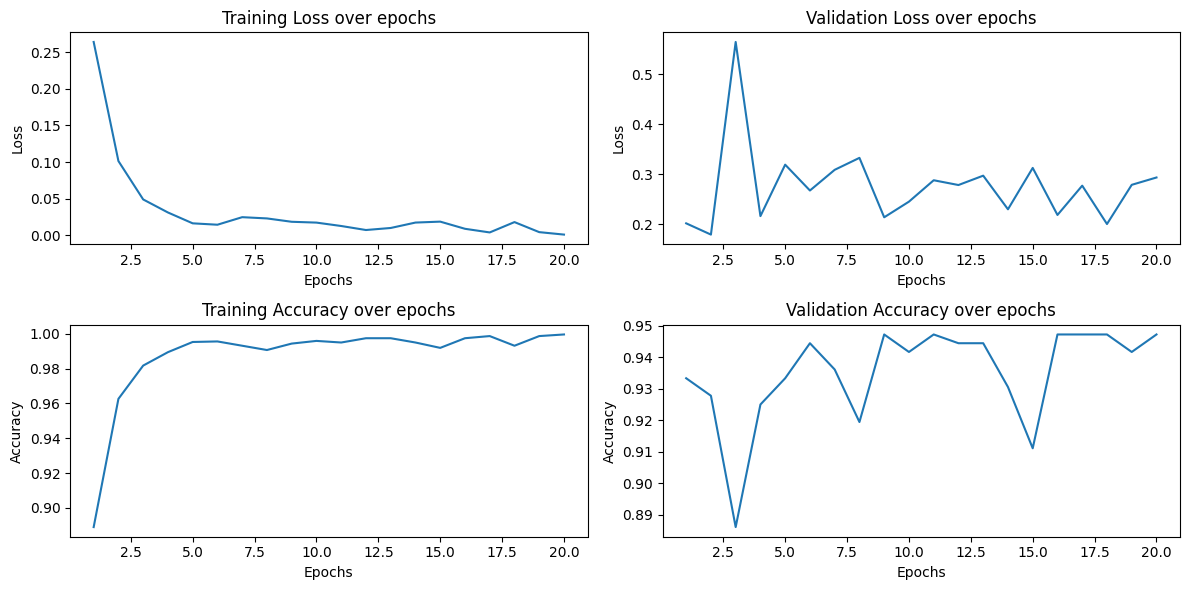

In [20]:
# Plot 
plot_results(num_epochs, train_losses, val_losses, train_accs, val_accs, task)

### 8.1.5 Test and visualizing

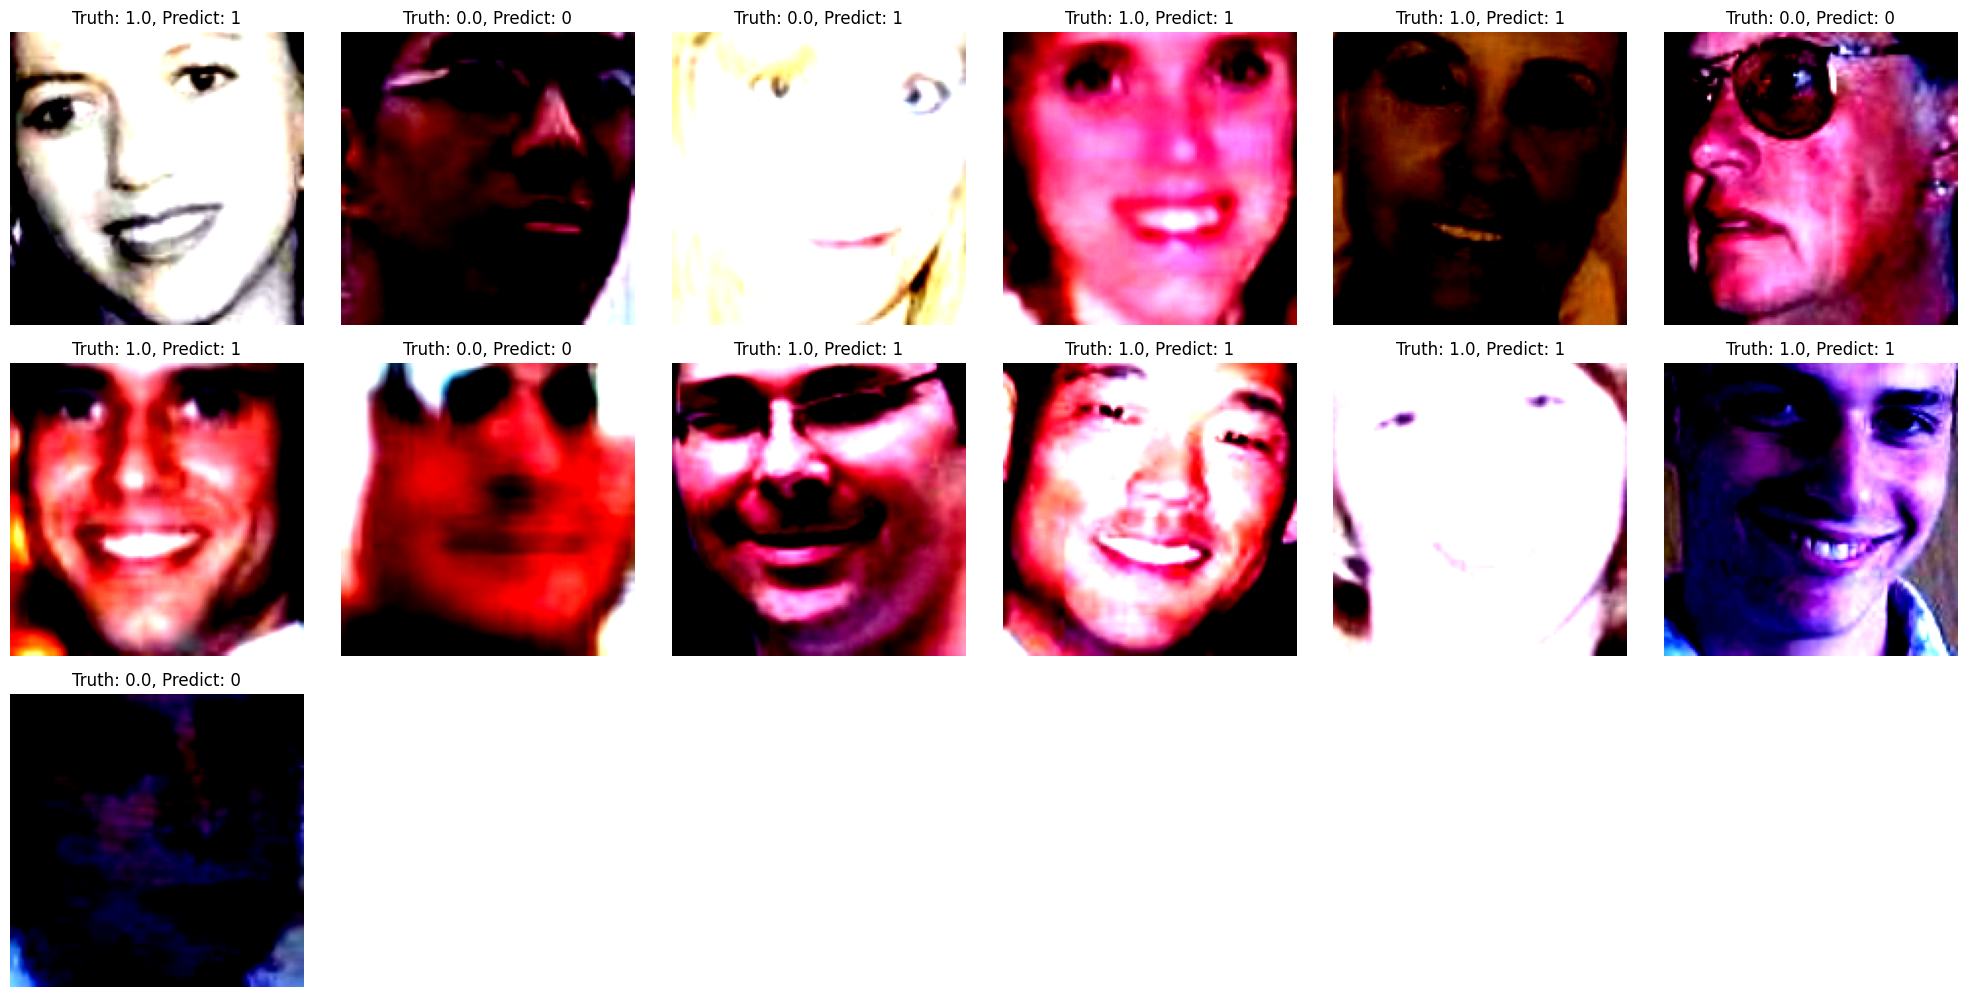

Test Results --> Loss: 0.4167, Accuracy: 0.9300


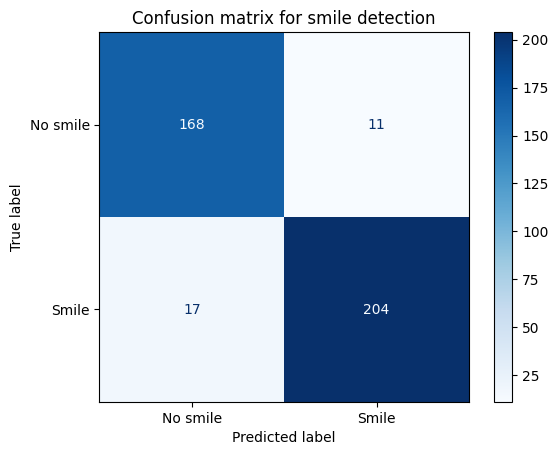

In [21]:

# Test and visualizing
if using_vote_system and task == "smile_detection":
    test_model_voting(model, criterion, test_loader, test_dataset, task, using_resnet, device, model_save_path, best_models)
else:
    test_model(model, criterion, test_loader, test_dataset, task, using_resnet, device, model_save_path)


## 8.2 For task 2 head_pose_predict

### 8.2.1 Set parameters

In [22]:
# Set parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
task = "head_pose_predict"
num_epochs = 100
learning_rate = 1e-4
batch_size = 32
step_size = 70
gamma = 0.1
using_crop_img = False
using_data_augmentation = False
num_data_arg_img = 1
using_resnet = True
continue_train = False
model_continue_path = ""
topk = 1
using_vote_system = True
data_dir = "./genki4k/crop_img_data" if using_crop_img else "./genki4k/files"
label_file = "./genki4k/labels.txt"
model_save_path = "./task_smile/finetune_models/model_" if task == "smile_detection" else "./task_pose/finetune_models_1/model_"


### 8.2.2 Create model optimizers and loss functions adn Load data

In [23]:
# Create model
model = create_model(task, using_resnet, continue_train, model_continue_path, device)

# Create optimizers and loss functions
optimizer, criterion = create_optimizer_and_criterion(model, learning_rate, step_size, gamma, task)

# Load data
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = process_data(data_dir, label_file, task, using_data_augmentation, num_data_arg_img, batch_size, device)



### 8.2.3 Train model

In [24]:

# Train model
train_accs, train_losses, val_accs, val_losses, best_models = train_model(model, criterion, optimizer, train_loader, val_loader, train_dataset, val_dataset, num_epochs, task, using_resnet, device, topk, model_save_path)


==================== Epoch 1 ====================
train Phase --> Loss: 0.1161
valid Phase --> Loss: 0.0909


--> Model saved at epoch 1, Loss: 0.0909 <--

==================== Epoch 2 ====================
train Phase --> Loss: 0.0683
valid Phase --> Loss: 0.0794


--> Model saved at epoch 2, Loss: 0.0794 <--

==================== Epoch 3 ====================
train Phase --> Loss: 0.0496
valid Phase --> Loss: 0.0682


--> Model saved at epoch 3, Loss: 0.0682 <--

==================== Epoch 4 ====================
train Phase --> Loss: 0.0405
valid Phase --> Loss: 0.0628


--> Model saved at epoch 4, Loss: 0.0628 <--

==================== Epoch 5 ====================
train Phase --> Loss: 0.0350
valid Phase --> Loss: 0.0616


--> Model saved at epoch 5, Loss: 0.0616 <--

==================== Epoch 6 ====================
train Phase --> Loss: 0.0311
valid Phase --> Loss: 0.0574


--> Model saved at epoch 6, Loss: 0.0574 <--

==================== Epoch 7 ====================
train Phase --

### 8.2.4 Plot and result visualizing

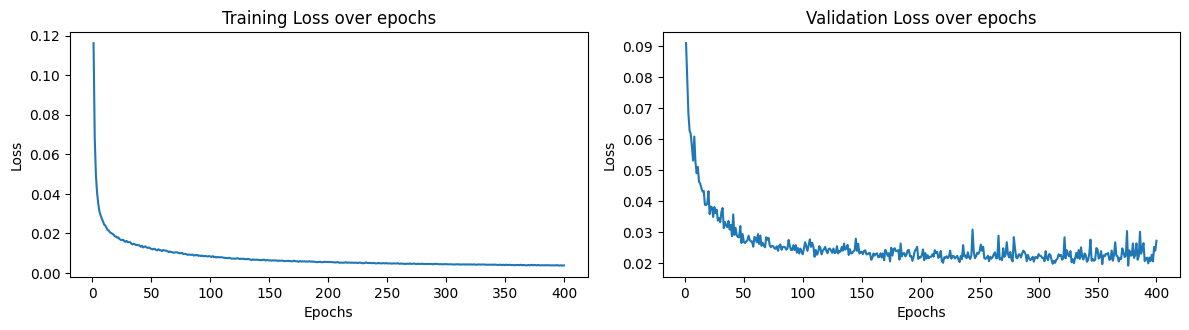

In [25]:
# Plot 
plot_results(num_epochs, train_losses, val_losses, train_accs, val_accs, task)

### 8.2.5 Test and visualizing

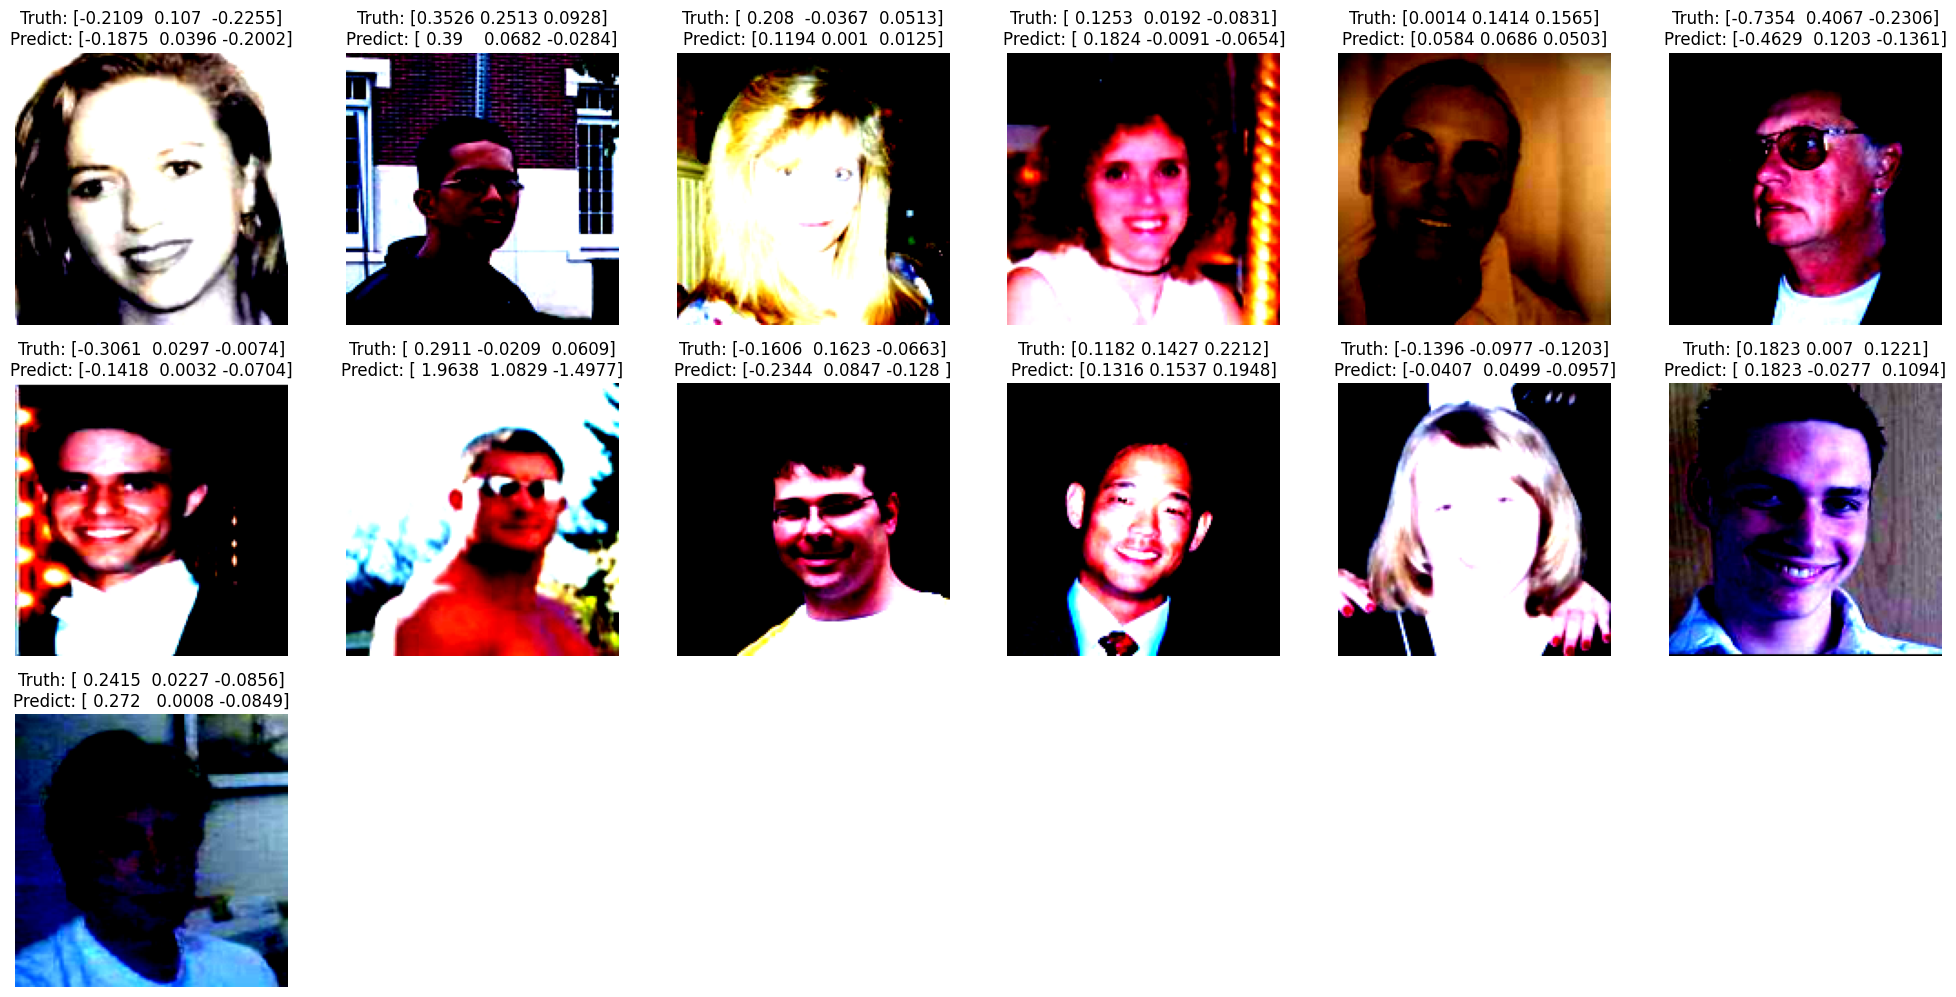

Test Results --> Loss: 0.0329


In [26]:

# Test and visualizing
if using_vote_system and task == "smile_detection":
    test_model_voting(model, criterion, test_loader, test_dataset, task, using_resnet, device, model_save_path, best_models)
else:
    test_model(model, criterion, test_loader, test_dataset, task, using_resnet, device, model_save_path)


# 9 Conclusion

In conclusion, the machine learning pipeline developed in this project demonstrates the effectiveness of using deep learning models for image classification tasks such as smile detection and head pose prediction. The pipeline includes various stages such as data preprocessing, model definition, parameter setting, dataset processing, model training, validation, testing, and result visualization.

The findings from the experiments show that both the custom-built model and the pre-trained ResNet model can achieve good performance on the tasks. The voting system also shows potential in improving the performance by combining the predictions of the best models.

The experimental results reveal several key insights:

- 1. **Effect of Manually Built Models**: The performance of manually built models **`My_Smile_Model`** is relatively weak in face recognition tasks. In contrast, deeper models like ResNet can effectively capture facial information. This suggests that cropping the data to focus on faces significantly improves the performance of our model, while the improvement on ResNet is less pronounced. Because `resnet50` is very deep, it can capture the information of the face, and our `My_Smile_Model` is shallow, so we need the crop image to assist. 

- 2. **Data Augmentation**: The original data is somewhat fuzzy, and transforming the image data can greatly affect the clarity of features. Many transformation methods can severely damage features, preventing the model from extracting useful information from them. Therefore, it's crucial to add some randomness to the data enhancement process, which can effectively mitigate overfitting.

- 3. **Head Pose Prediction**: Most of the data in the images are oriented towards the screen, and the angles are small. The accuracy of the labels is also questionable. These makes it challenging for the model to learn this information, resulting in a situation where the model's effects are more random. At the same time, the loss can not drop lower. 

These findings highlight the importance of using appropriate models, data preprocessing techniques, and label accuracy in achieving good performance in image classification tasks.

As for the next steps, there are several directions to explore:

1. **Model Improvement**: Experiment with other models or architectures to see if they can achieve better performance. This could include other pre-trained models or different types of networks like Capsule Networks or Transformer Networks.

2. **Hyperparameter Tuning**: Perform a more thorough hyperparameter tuning to find the optimal settings for the models. This could include tuning the learning rate, batch size, number 

3. **Data Augmentation**: Experiment with other data augmentation techniques to further increase the diversity of the training data and improve the model's ability to generalize.

4. **Feature Extraction**: Explore other feature extraction techniques or use other types of input data to improve the model's performance.

The project has successfully achieved the assigned objectives and the outcomes have been thoroughly analyzed.